In [1]:
import pandas as pd
import warnings

# warnings'i devre dışı bırak
warnings.filterwarnings('ignore')

# train.csv ve test.csv dosyalarını okuyun
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# İlk 5 satırı görüntüleme
print('Eğitim Veri Setinin İlk 5 Satırı:')
print(train_df.head())
print('\n')

# Veri setinin genel bilgilerini (sütun tipleri, eksik değerler vb.) görüntüleme
print('Eğitim Veri Seti Bilgileri:')
train_df.info()
print('\n')

# test.csv dosyasının ilk 5 satırını görüntüleme
print('Test Veri Setinin İlk 5 Satırı:')
print(test_df.head())
print('\n')

# test.csv dosyasının genel bilgilerini (sütun tipleri, eksik değerler vb.) görüntüleme
print('Test Veri Seti Bilgileri:')
test_df.info()
print('\n')

# Veri açıklamalarını okuma ve görüntüleme
print('Veri Açıklamaları:')
with open('data_description.txt', 'r') as file:
    data_description = file.read()
    print(data_description)

Eğitim Veri Setinin İlk 5 Satırı:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition 

--- 'SalePrice' Sütunu Dağılım Analizi ---


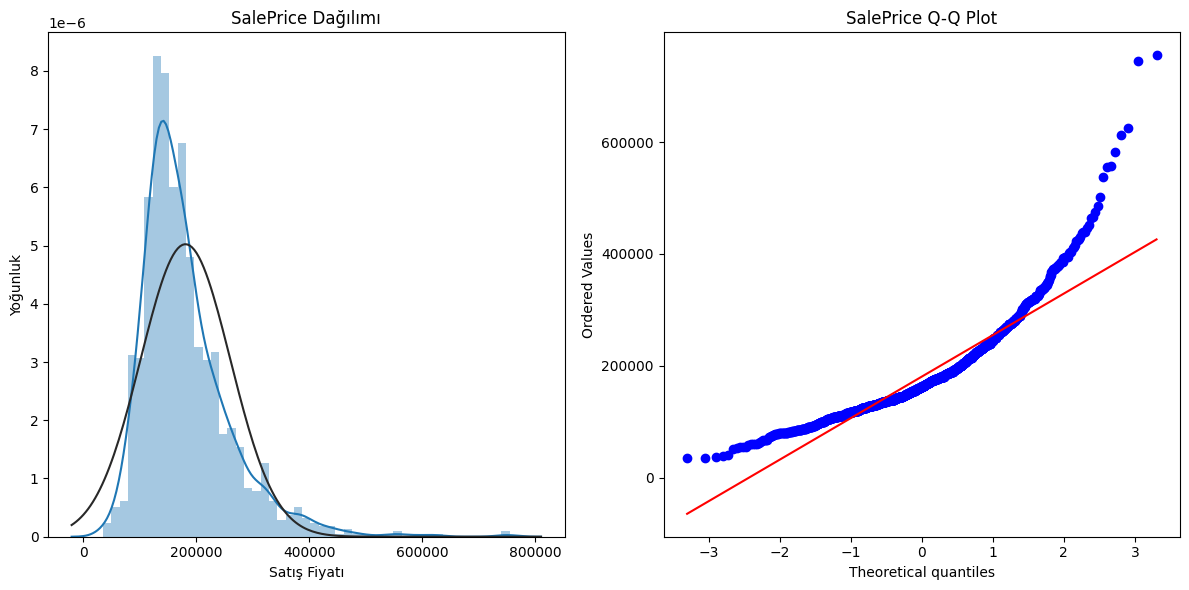


--- Özellikler ve 'SalePrice' Arasındaki Korelasyon ---


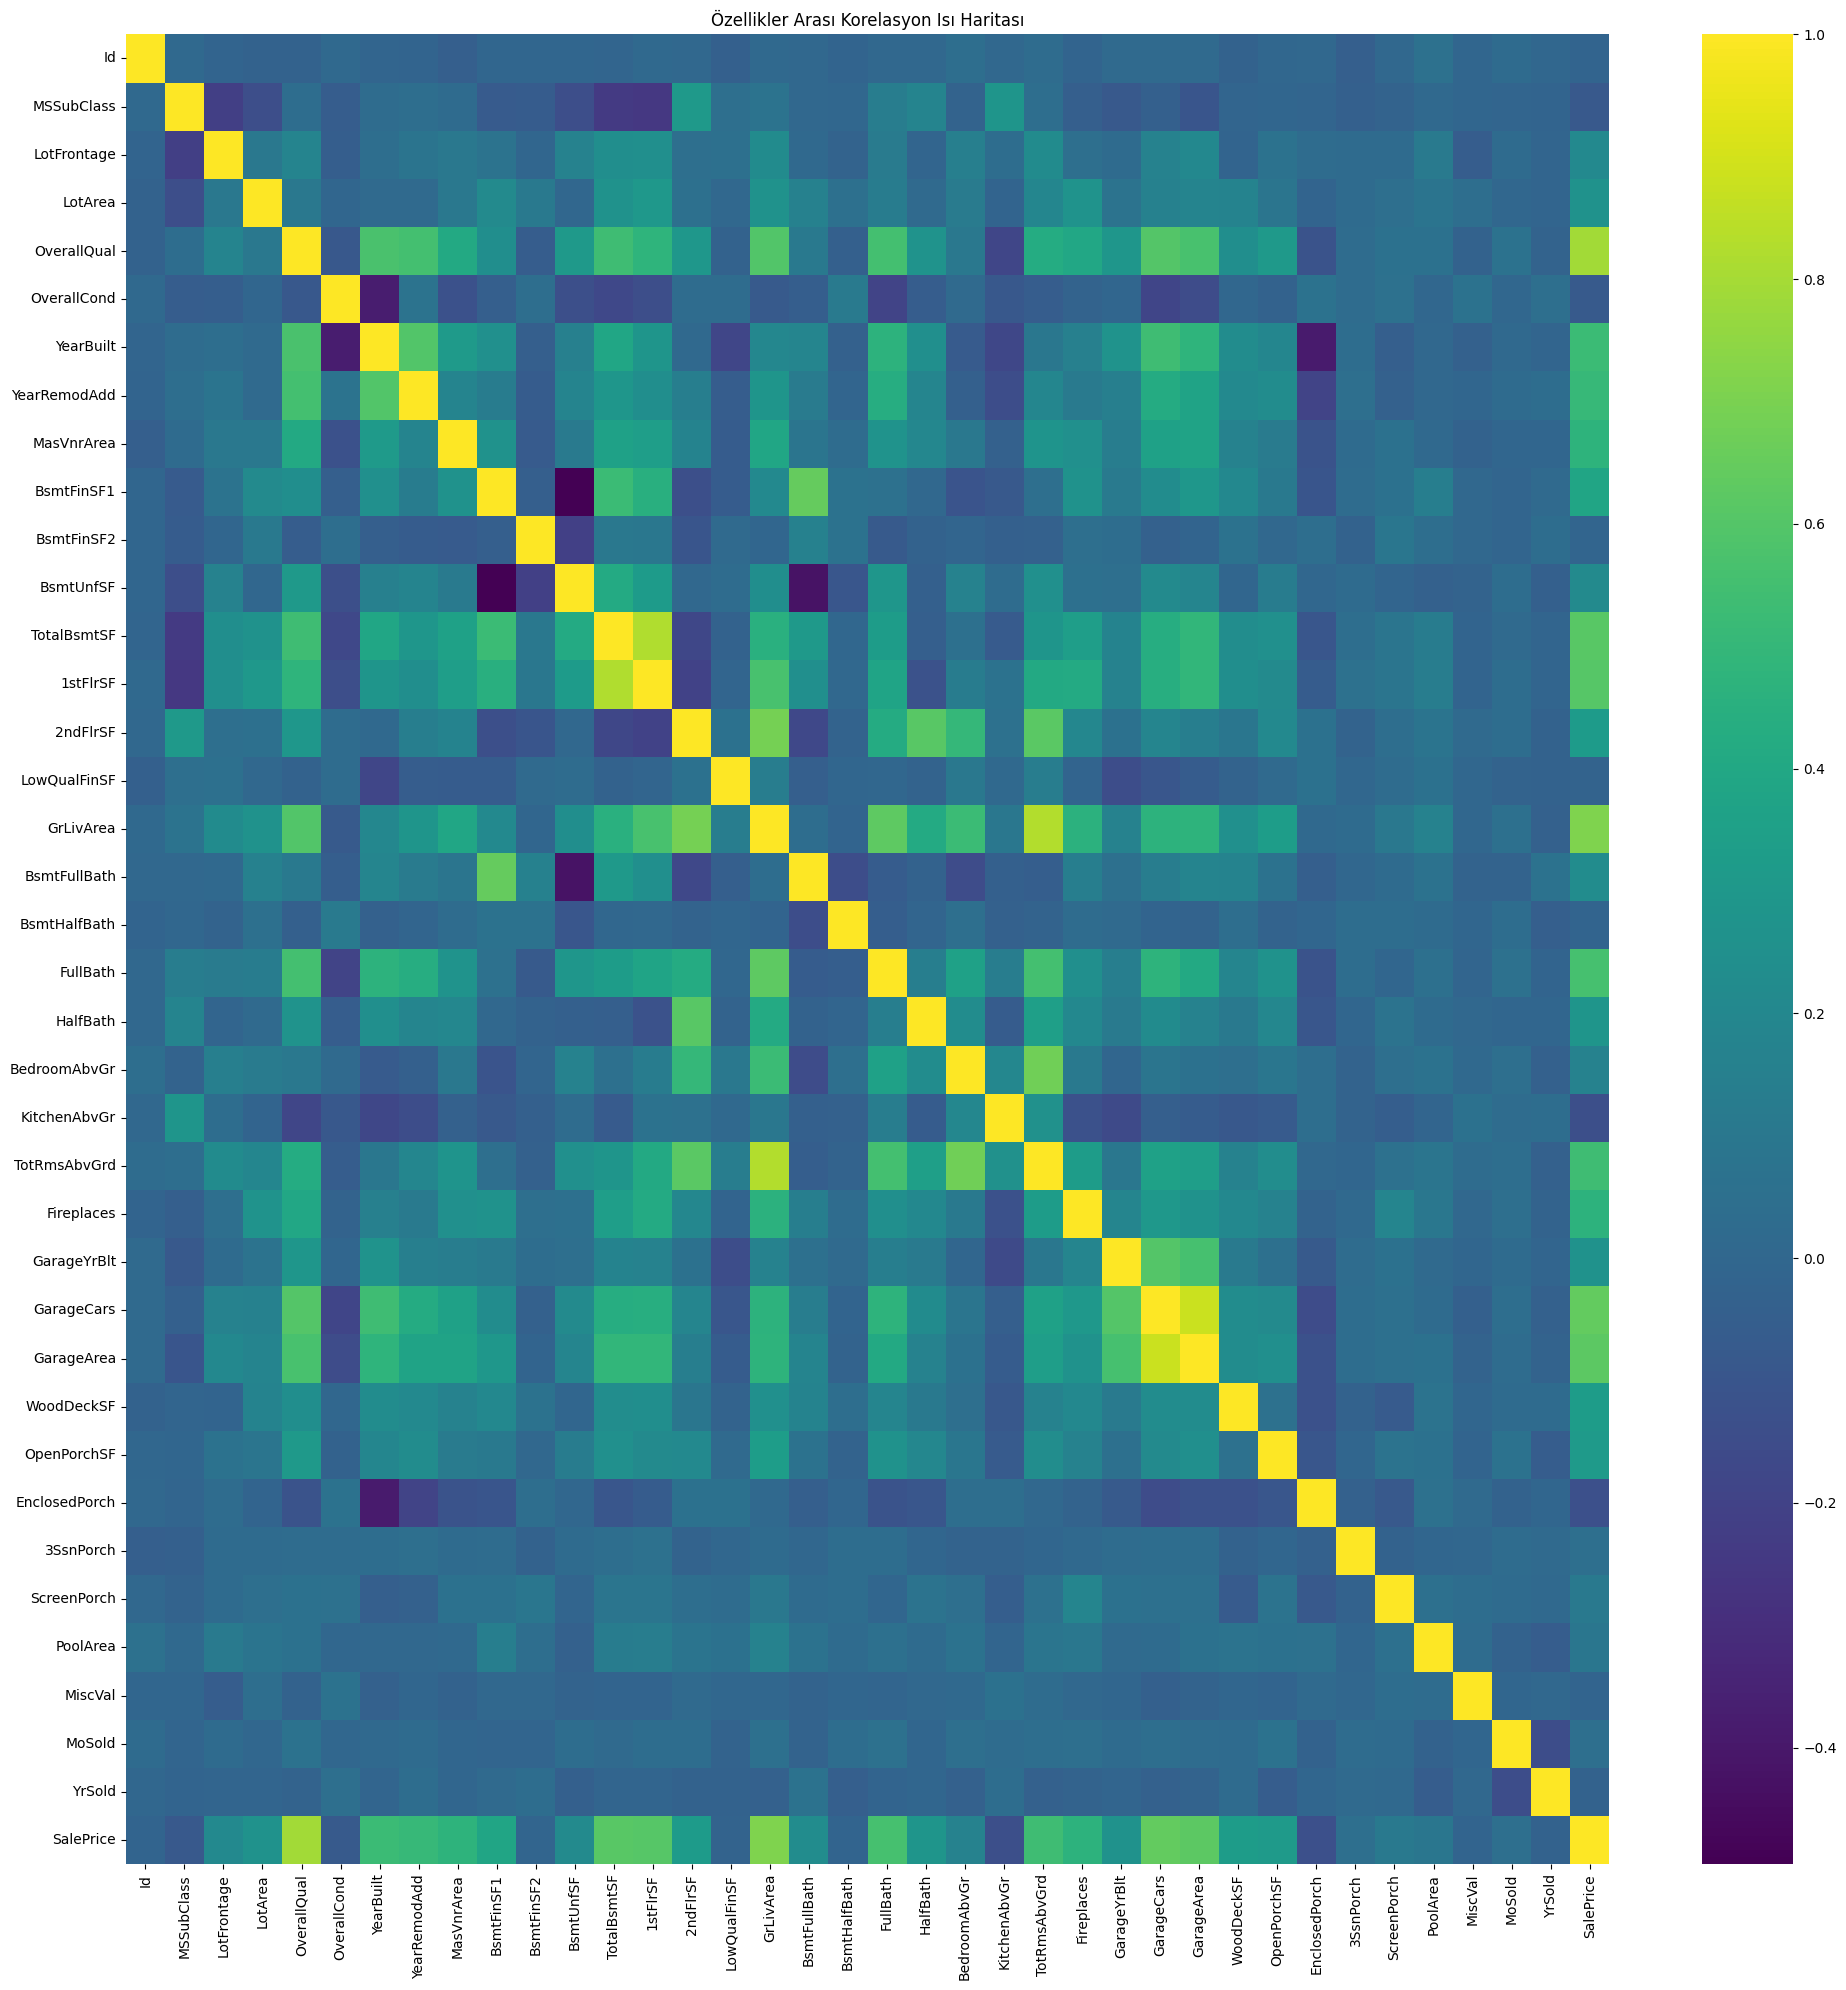


--- 'SalePrice' Zaman Serisi Analizi ---


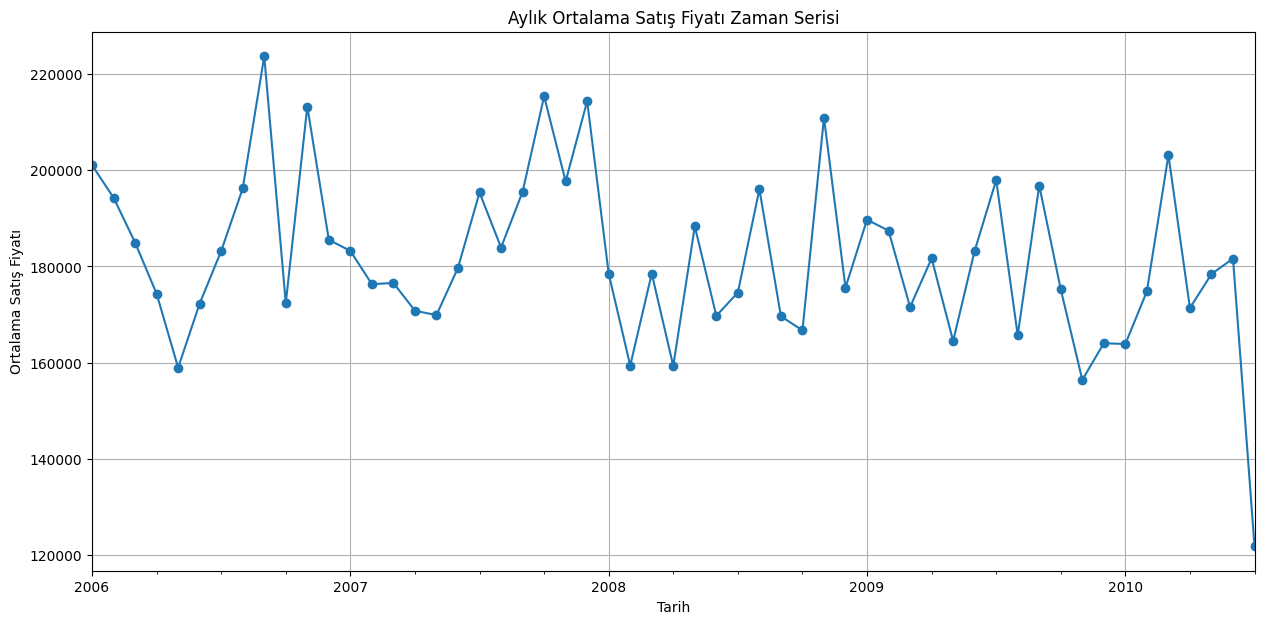


--- Veri Ön İşleme Sonrası Durum ---
Eğitim veri setindeki eksik değerlerin kontrolü:
Id              0
GarageCars      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# warnings'i devre dışı bırak
import warnings
warnings.filterwarnings('ignore')

# train.csv dosyasını okuyun
train_df = pd.read_csv('train.csv')

# --- Eksik Değerleri Doldurma ve Veri Ön İşleme ---
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'Exterior1st',
            'Exterior2nd', 'SaleType'):
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna('None')

for col in ('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'LotFrontage'):
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(0)

for col in ('Electrical', 'KitchenQual'):
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# --- Zaman Serisi için Yeni Sütun ---
train_df['DateSold'] = pd.to_datetime(train_df['YrSold'].astype(str) + '-' + train_df['MoSold'].astype(str), format='%Y-%m')
train_df = train_df.sort_values(by='DateSold')

# --- EDA ---
print("--- 'SalePrice' Sütunu Dağılım Analizi ---")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(train_df['SalePrice'], fit=norm)
plt.title('SalePrice Dağılımı')
plt.xlabel('Satış Fiyatı')
plt.ylabel('Yoğunluk')

plt.subplot(1, 2, 2)
stats.probplot(train_df['SalePrice'], plot=plt)
plt.title('SalePrice Q-Q Plot')
plt.tight_layout()
plt.show()

print("\n--- Özellikler ve 'SalePrice' Arasındaki Korelasyon ---")
corrmat = train_df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=False, cmap='viridis')
plt.title('Özellikler Arası Korelasyon Isı Haritası')
plt.tight_layout()
plt.show()

print("\n--- 'SalePrice' Zaman Serisi Analizi ---")
plt.figure(figsize=(15, 7))
train_df.set_index('DateSold')['SalePrice'].resample('M').mean().plot(marker='o', linestyle='-')
plt.title('Aylık Ortalama Satış Fiyatı Zaman Serisi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Satış Fiyatı')
plt.grid(True)
plt.show()

print("\n--- Veri Ön İşleme Sonrası Durum ---")
print("Eğitim veri setindeki eksik değerlerin kontrolü:")
print(train_df.isnull().sum().sort_values(ascending=False).head(10))


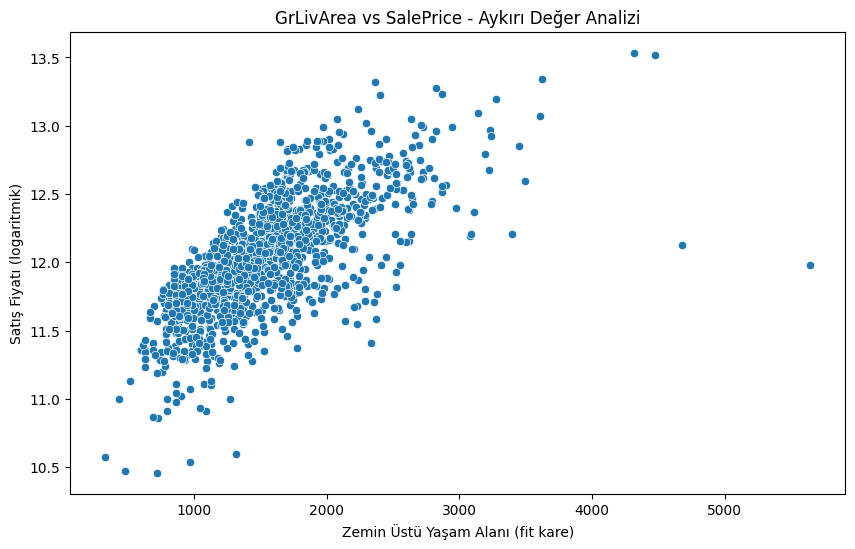

--- Özellik Mühendisliği Sonuçları ---
Eğitim veri setine eklenen yeni sütunlar (ilk 5 satır):
   TotalSF  Age  RemodAge  SalePrice
0     2566    5         5  12.247699
1     2524   31        31  12.109016
2     2706    7         6  12.317171
3     2473   91        36  11.849405
4     3343    8         8  12.429220

Test veri setine eklenen yeni sütunlar (ilk 5 satır):
   TotalSF  Age  RemodAge
0   1778.0   49        49
1   2658.0   52        52
2   2557.0   13        12
3   2530.0   12        12
4   2560.0   18        18

--- Yeni Özelliklerin SalePrice ile Korelasyonu ---
SalePrice    1.000000
TotalSF      0.825326
Age         -0.587767
RemodAge    -0.568529
Name: SalePrice, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings'i devre dışı bırak
import warnings
warnings.filterwarnings('ignore')

# train.csv ve test.csv dosyalarını okuyun
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# `SalePrice`'ı logaritmik olarak dönüştürme, dağılımı normale daha yakın hale getirmek için
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Aykırı değer analizi için 'GrLivArea' ve 'SalePrice' arasındaki ilişkiyi gösteren bir saçılım grafiği çizme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('GrLivArea vs SalePrice - Aykırı Değer Analizi')
plt.xlabel('Zemin Üstü Yaşam Alanı (fit kare)')
plt.ylabel('Satış Fiyatı (logaritmik)')
plt.show()

# Aykırı değerleri kaldırma
# Gözlem: 4000 fit kareden büyük GrLivArea'ya sahip, ancak fiyatı düşük olan evler aykırı değer olarak kabul edilebilir.
# Bu evleri veri setinden çıkaralım.
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 12.5)].index)

# Eksik değerleri doldurma (önceki adımda kullanılan mantıkla)
for df in [train_df, test_df]:
    for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'Exterior2nd', 'SaleType'):
        if col in df.columns:
            df[col] = df[col].fillna('None')

    for col in ('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'LotFrontage'):
        if col in df.columns:
            df[col] = df[col].fillna(0)
            
    for col in ('Electrical', 'KitchenQual'):
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

# --- Özellik Mühendisliği ---
# Yaş, yeniden düzenleme yaşı ve toplam metrekare gibi yeni özellikler oluşturma
for df in [train_df, test_df]:
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

    # Yaşın 0'dan küçük olmamasını sağlama
    df.loc[df['Age'] < 0, 'Age'] = 0
    df.loc[df['RemodAge'] < 0, 'RemodAge'] = 0

print("--- Özellik Mühendisliği Sonuçları ---")
print("Eğitim veri setine eklenen yeni sütunlar (ilk 5 satır):")
print(train_df[['TotalSF', 'Age', 'RemodAge', 'SalePrice']].head())
print("\nTest veri setine eklenen yeni sütunlar (ilk 5 satır):")
print(test_df[['TotalSF', 'Age', 'RemodAge']].head())

# Yeni özelliklerin `SalePrice` ile korelasyonunu kontrol etme
print("\n--- Yeni Özelliklerin SalePrice ile Korelasyonu ---")
print(train_df[['SalePrice', 'TotalSF', 'Age', 'RemodAge']].corr()['SalePrice'])

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import warnings

# warnings'i devre dışı bırak
warnings.filterwarnings('ignore')

# train.csv ve test.csv dosyalarını okuyun
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# `SalePrice`'ı logaritmik olarak dönüştürme ve aykırı değerleri kaldırma (önceki adımdan)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 12.5)].index)

# Eğitim ve test verilerini birleştirme (ön işleme kolaylığı için)
all_data = pd.concat((train_df.loc[:, 'MSSubClass':'SaleCondition'],
                      test_df.loc[:, 'MSSubClass':'SaleCondition']), ignore_index=True)

# Eksik değerleri doldurma (önceki adımlardan)
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna('None')

for col in ('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'LotFrontage'):
    all_data[col] = all_data[col].fillna(0)

for col in ('Electrical', 'KitchenQual'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# Özellik Mühendisliği (önceki adımdan)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data.loc[all_data['Age'] < 0, 'Age'] = 0
all_data.loc[all_data['RemodAge'] < 0, 'RemodAge'] = 0

# Kategorik özellikleri One-Hot Encoding ile sayısal verilere dönüştürme
all_data = pd.get_dummies(all_data, dummy_na=False)

# Veriyi tekrar eğitim ve test setlerine ayırma
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y_train = train_df['SalePrice']

# --- Model Oluşturma ve Tahmin ---
print("--- Regresyon Modelleri Oluşturuluyor ve Eğitiliyor ---")

# En iyi performansı veren modeli bulmak için K-Fold Çapraz Doğrulama
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lasso Regresyon Modeli
lasso = Lasso(alpha=0.0005, random_state=1)
lasso_score = np.sqrt(-cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)).mean()
print(f"Lasso Modeli K-Fold Cross-Validation RMSE: {lasso_score:.4f}")

# Ridge Regresyon Modeli
ridge = Ridge(alpha=10)
ridge_score = np.sqrt(-cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)).mean()
print(f"Ridge Modeli K-Fold Cross-Validation RMSE: {ridge_score:.4f}")

# En iyi performans gösteren modeli (varsayımsal olarak Lasso) kullanarak tahmin yapma
# Gerçek bir projede, bu modellerin hiperparametreleri ayarlanmalı ve en iyi performans gösteren seçilmelidir.
final_model = lasso.fit(X_train, y_train)
y_pred_log = final_model.predict(X_test)

# Logaritmik dönüşümü geri alma
y_pred = np.expm1(y_pred_log)

# Tahminleri Kaggle gönderim formatına dönüştürme ve CSV'ye kaydetme
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred})
submission.to_csv('submission_predictions.csv', index=False)

print("\n--- Tahminler 'submission_predictions.csv' dosyasına kaydedildi ---")
print("Oluşturulan gönderim dosyasının ilk 5 satırı:")
print(submission.head())

--- Regresyon Modelleri Oluşturuluyor ve Eğitiliyor ---
Lasso Modeli K-Fold Cross-Validation RMSE: 0.1118
Ridge Modeli K-Fold Cross-Validation RMSE: 0.1129

--- Tahminler 'submission_predictions.csv' dosyasına kaydedildi ---
Oluşturulan gönderim dosyasının ilk 5 satırı:
     Id      SalePrice
0  1461  119542.850101
1  1462  146959.553835
2  1463  178327.526486
3  1464  201047.132100
4  1465  189549.008743


--- Zaman Serisi Dekompozisyonu ---


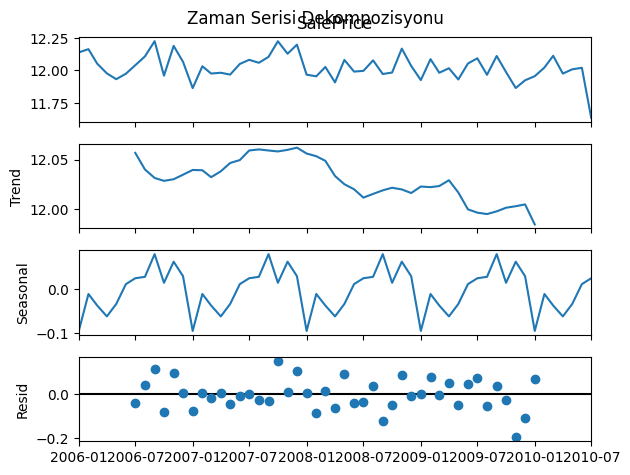


--- Augmented Dickey-Fuller Testi (Durağanlık Kontrolü) ---
ADF İstatistiği: -3.7551
p-değeri: 0.0034
p-değeri 0.05'ten küçük, seri durağandır.

--- ARIMA Modeli Oluşturuluyor ve Eğitiliyor ---
                               SARIMAX Results                                
Dep. Variable:              SalePrice   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  46.910
Date:                Tue, 12 Aug 2025   AIC                            -87.820
Time:                        13:28:34   BIC                            -81.853
Sample:                    01-01-2006   HQIC                           -85.519
                         - 07-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          

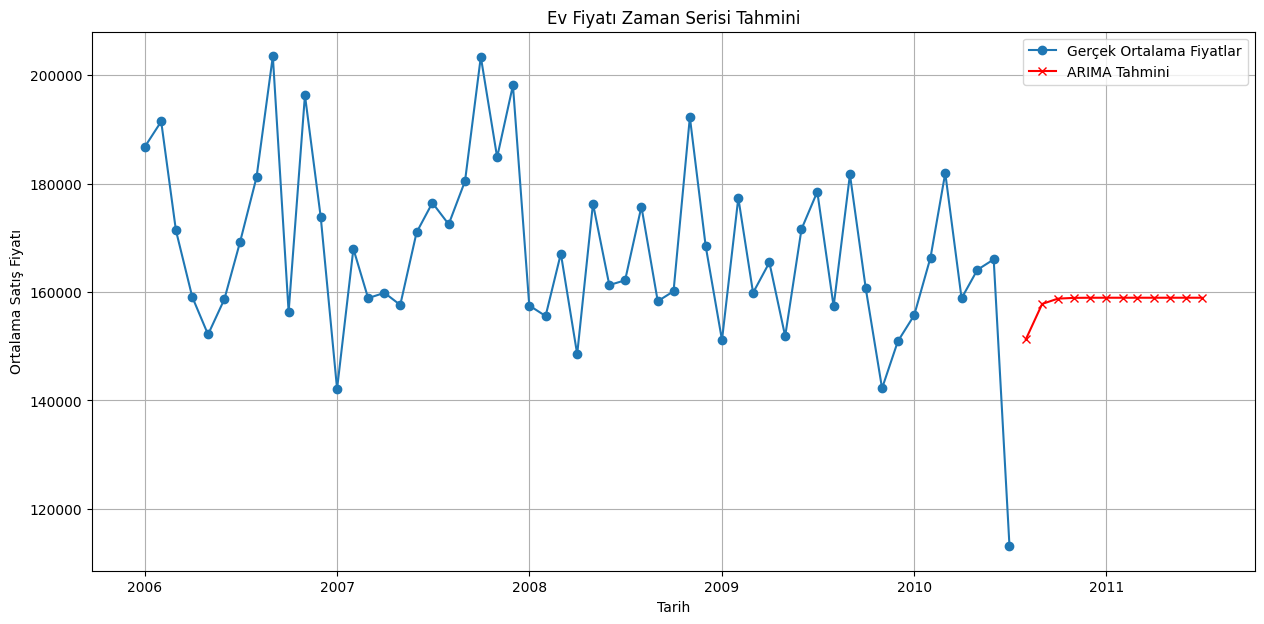

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings

# warnings'i devre dışı bırak
warnings.filterwarnings('ignore')

# train.csv dosyasını okuyun
train_df = pd.read_csv('train.csv')

# --- Zaman Serisi Veri Hazırlığı ---
# `SalePrice`'ı logaritmik olarak dönüştürme (zaman serisi için de faydalı)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Aykırı değerleri kaldırma
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 12.5)].index)

# `MoSold` ve `YrSold` sütunlarını kullanarak bir tarih sütunu (`DateSold`) oluşturma
train_df['DateSold'] = pd.to_datetime(train_df['YrSold'].astype(str) + '-' + train_df['MoSold'].astype(str), format='%Y-%m')
train_df = train_df.sort_values(by='DateSold')

# `DateSold`'u indeks olarak ayarlayarak ve aylık ortalama fiyatları alarak zaman serisi oluşturma
ts = train_df.set_index('DateSold')['SalePrice'].resample('MS').mean()

# Eksik ayları doldurma
ts = ts.fillna(ts.mean())

# --- Zaman Serisi Dekompozisyonu ve Durağanlık Analizi ---
print("--- Zaman Serisi Dekompozisyonu ---")
decomposition = seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.suptitle('Zaman Serisi Dekompozisyonu')
plt.show()

# Augmented Dickey-Fuller (ADF) testi ile durağanlık kontrolü
print("\n--- Augmented Dickey-Fuller Testi (Durağanlık Kontrolü) ---")
result = adfuller(ts)
print(f'ADF İstatistiği: {result[0]:.4f}')
print(f'p-değeri: {result[1]:.4f}')
if result[1] <= 0.05:
    print("p-değeri 0.05'ten küçük, seri durağandır.")
else:
    print("p-değeri 0.05'ten büyük, seri durağan değildir. Fark alma işlemi uygulanacak.")
    # Seriyi durağanlaştırmak için 1. dereceden fark alma
    ts_diff = ts.diff().dropna()
    print("Fark alma sonrası ADF testi:")
    result_diff = adfuller(ts_diff)
    print(f'ADF İstatistiği (Farklı): {result_diff[0]:.4f}')
    print(f'p-değeri (Farklı): {result_diff[1]:.4f}')
    if result_diff[1] <= 0.05:
        print("Fark alma sonrası seri durağan hale geldi.")
        ts = ts_diff
    else:
        print("Seri hala durağan değil, model için daha fazla fark alma gerekebilir.")

# --- ARIMA Modeli Oluşturma ve Tahmin ---
print("\n--- ARIMA Modeli Oluşturuluyor ve Eğitiliyor ---")
# Basit bir model (1, 1, 1) kullanarak modelleme yapalım.
# Gerçek bir senaryoda bu parametreler (p,d,q) belirlenmelidir.
# d=1, çünkü durağanlık için bir kez fark alma işlemi yaptık.
order = (1, 1, 1)

try:
    model = ARIMA(ts, order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    
    # Gelecek 12 ay için tahmin yapma
    forecast_steps = 12
    forecast = model_fit.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    
    # Orijinal logaritmik ölçeğe geri dönüş
    forecast_values = np.expm1(forecast_values)

    # Tahmin sonuçlarını gösterme
    print("\n--- Gelecek 12 Aylık Tahmin Sonuçları ---")
    print(forecast_values.head(forecast_steps))

    # Orijinal veriyi ve tahmini görselleştirme
    plt.figure(figsize=(15, 7))
    ts_original = train_df.set_index('DateSold')['SalePrice'].resample('MS').mean()
    plt.plot(np.expm1(ts_original), label='Gerçek Ortalama Fiyatlar', marker='o')
    plt.plot(forecast_values, label='ARIMA Tahmini', marker='x', color='red')
    plt.title('Ev Fiyatı Zaman Serisi Tahmini')
    plt.xlabel('Tarih')
    plt.ylabel('Ortalama Satış Fiyatı')
    plt.legend()
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"ARIMA modeli eğitilirken bir hata oluştu: {e}")

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import warnings

warnings.filterwarnings('ignore')

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 12.5)].index)

all_data = pd.concat((train_df.loc[:, 'MSSubClass':'SaleCondition'],
                      test_df.loc[:, 'MSSubClass':'SaleCondition']), ignore_index=True)

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna('None')

for col in ('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'LotFrontage'):
    all_data[col] = all_data[col].fillna(0)

for col in ('Electrical', 'KitchenQual'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data.loc[all_data['Age'] < 0, 'Age'] = 0
all_data.loc[all_data['RemodAge'] < 0, 'RemodAge'] = 0

all_data = pd.get_dummies(all_data, dummy_na=False)

X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y_train = train_df['SalePrice']

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_metric = 'neg_mean_squared_error'

lasso_params = {'alpha': np.logspace(-4, -0.5, 30)}
lasso_grid = GridSearchCV(Lasso(random_state=42), lasso_params, scoring=scoring_metric, cv=kf)
lasso_grid.fit(X_train, y_train)
lasso_score = np.sqrt(-lasso_grid.best_score_)
print(f"En iyi Lasso Modeli (En iyi Alpha: {lasso_grid.best_params_['alpha']:.4f}) K-Fold Cross-Validation RMSE: {lasso_score:.4f}")

ridge_params = {'alpha': np.logspace(-4, 2, 30)}
ridge_grid = GridSearchCV(Ridge(random_state=42), ridge_params, scoring=scoring_metric, cv=kf)
ridge_grid.fit(X_train, y_train)
ridge_score = np.sqrt(-ridge_grid.best_score_)
print(f"En iyi Ridge Modeli (En iyi Alpha: {ridge_grid.best_params_['alpha']:.4f}) K-Fold Cross-Validation RMSE: {ridge_score:.4f}")

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4,
                                subsample=0.8, loss='huber', random_state=42)
gbr_score = np.sqrt(-cross_val_score(gbr, X_train, y_train, scoring=scoring_metric, cv=kf)).mean()
print(f"Gradient Boosting Modeli K-Fold Cross-Validation RMSE: {gbr_score:.4f}")

final_model = gbr.fit(X_train, y_train)
y_pred_log = final_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred})
submission.to_csv('submission_gbr_predictions.csv', index=False)

print("\n--- Gelişmiş ve Ayarlanmış Modellerle Tahminler 'submission_gbr_predictions.csv' dosyasına kaydedildi ---")
print("Oluşturulan gönderim dosyasının ilk 5 satırı:")
print(submission.head())

En iyi Lasso Modeli (En iyi Alpha: 0.0004) K-Fold Cross-Validation RMSE: 0.1124
En iyi Ridge Modeli (En iyi Alpha: 9.2367) K-Fold Cross-Validation RMSE: 0.1138
Gradient Boosting Modeli K-Fold Cross-Validation RMSE: 0.1174

--- Gelişmiş ve Ayarlanmış Modellerle Tahminler 'submission_gbr_predictions.csv' dosyasına kaydedildi ---
Oluşturulan gönderim dosyasının ilk 5 satırı:
     Id      SalePrice
0  1461  130726.775899
1  1462  171144.512949
2  1463  189990.480790
3  1464  195967.527422
4  1465  183497.034196


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, GridSearchCV
import warnings

warnings.filterwarnings('ignore')

# --- Veri Yükleme ---
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Log dönüşümü
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Aykırı değer temizleme
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & 
                                  (train_df['SalePrice'] < 12.5)].index)

# Tüm verileri birleştirme (train + test, hedef hariç)
all_data = pd.concat((train_df.loc[:, 'MSSubClass':'SaleCondition'],
                      test_df.loc[:, 'MSSubClass':'SaleCondition']),
                      ignore_index=True)

# Eksik değer doldurma (kategorik)
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 
            'Functional', 'Utilities', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna('None')

# Eksik değer doldurma (sayısal)
for col in ('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 
            'LotFrontage'):
    all_data[col] = all_data[col].fillna(0)

# Eksik değer doldurma (mod)
for col in ('Electrical', 'KitchenQual'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# Yeni özellikler
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data.loc[all_data['Age'] < 0, 'Age'] = 0
all_data.loc[all_data['RemodAge'] < 0, 'RemodAge'] = 0

# One-hot encoding
all_data = pd.get_dummies(all_data, dummy_na=False)

# Train ve test verilerini ayırma
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y_train = train_df['SalePrice']

# K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lasso için en iyi alpha'yı bulma
lasso_params = {'alpha': np.logspace(-4, -0.5, 30)}
lasso_grid = GridSearchCV(Lasso(random_state=42), lasso_params, 
                          scoring='neg_mean_squared_error', cv=kf)
lasso_grid.fit(X_train, y_train)

# En iyi skor
lasso_score = np.sqrt(-lasso_grid.best_score_)
print(f"En iyi Lasso Modeli (En iyi Alpha: {lasso_grid.best_params_['alpha']:.4f}) "
      f"K-Fold Cross-Validation RMSE: {lasso_score:.4f}")

# Final model ile tahmin
final_lasso = lasso_grid.best_estimator_
y_pred_log = final_lasso.predict(X_test)
y_pred = np.expm1(y_pred_log)  # log dönüşümünü geri al

# Submission dosyası
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred})
submission.to_csv('submission_lasso_predictions.csv', index=False)

print("\n--- Lasso Modeli ile Tahminler 'submission_lasso_predictions.csv' dosyasına kaydedildi ---")
print("Oluşturulan gönderim dosyasının ilk 5 satırı:")
print(submission.head())


En iyi Lasso Modeli (En iyi Alpha: 0.0004) K-Fold Cross-Validation RMSE: 0.1124

--- Lasso Modeli ile Tahminler 'submission_lasso_predictions.csv' dosyasına kaydedildi ---
Oluşturulan gönderim dosyasının ilk 5 satırı:
     Id      SalePrice
0  1461  119327.340578
1  1462  147943.667222
2  1463  178589.190507
3  1464  200546.829561
4  1465  190485.646295


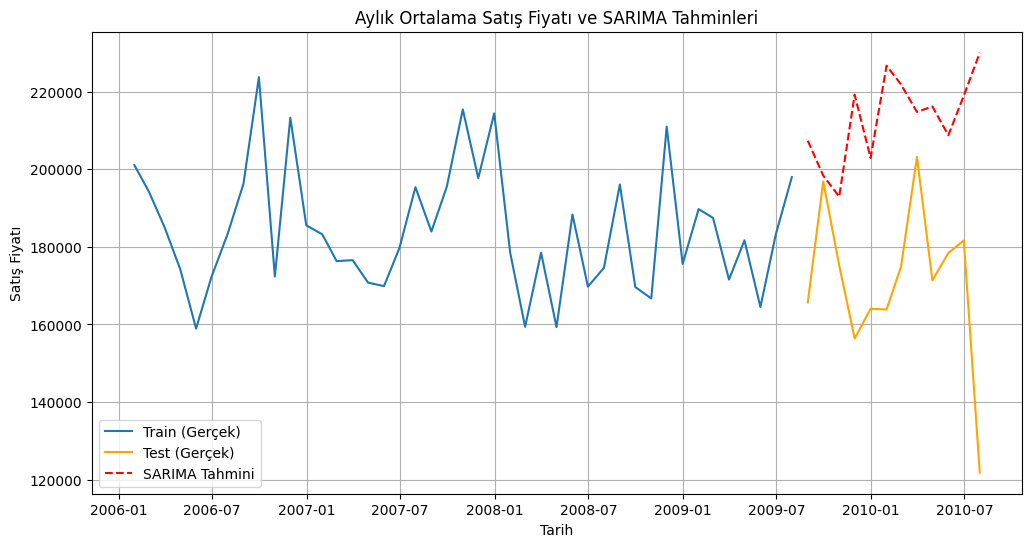

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Veri yükleme
train_df = pd.read_csv('train.csv')

# DateSold sütunu oluştur (yıl-ay)
train_df['DateSold'] = pd.to_datetime(train_df['YrSold'].astype(str) + '-' + train_df['MoSold'].astype(str), format='%Y-%m')
train_df = train_df.sort_values(by='DateSold')

# Aylık ortalama satış fiyatı (log dönüşümü uygulamadım, istersen ekleyebiliriz)
monthly_sales = train_df.set_index('DateSold')['SalePrice'].resample('M').mean()

# Train ve test ayrımı (son 12 ay test)
train = monthly_sales[:-12]
test = monthly_sales[-12:]

# SARIMA modeli kurulumu ve eğitimi
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = model.fit(disp=False)

# Test dönemi tahminleri
pred = sarima_result.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Grafik çizimi
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train (Gerçek)')
plt.plot(test.index, test, label='Test (Gerçek)', color='orange')
plt.plot(pred.index, pred, label='SARIMA Tahmini', color='red', linestyle='--')
plt.title('Aylık Ortalama Satış Fiyatı ve SARIMA Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Satış Fiyatı')
plt.legend()
plt.grid(True)
plt.show()


Matplotlib is building the font cache; this may take a moment.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Fa

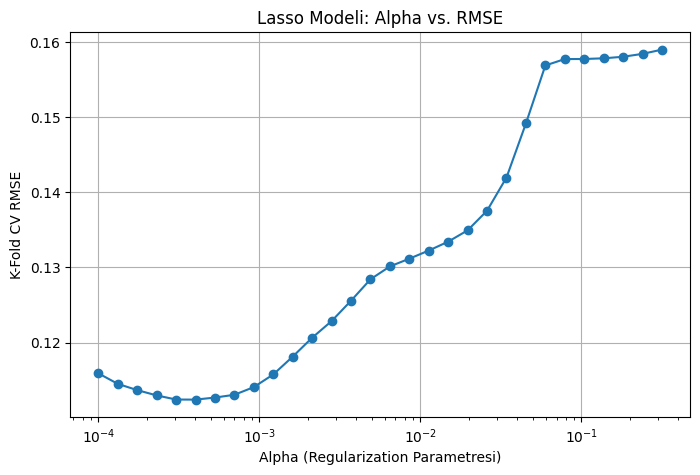

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

# Veri ve hedef hazır olsun (X_train, y_train) -- senin koddan alabilirsin

alphas = np.logspace(-4, -0.5, 30)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=42)
    neg_mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    rmse = np.sqrt(-neg_mse_scores.mean())
    rmse_scores.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(alphas, rmse_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Parametresi)')
plt.ylabel('K-Fold CV RMSE')
plt.title('Lasso Modeli: Alpha vs. RMSE')
plt.grid(True)
plt.show()


Grafikte RMSE’nin en düşük olduğu alpha, en iyi model parametresidir.

Çok küçük alpha -> overfitting, çok büyük alpha -> underfitting olur genellikle.

En iyi Lasso Modeli (En iyi Alpha: 0.0004) K-Fold Cross-Validation RMSE: 0.1124


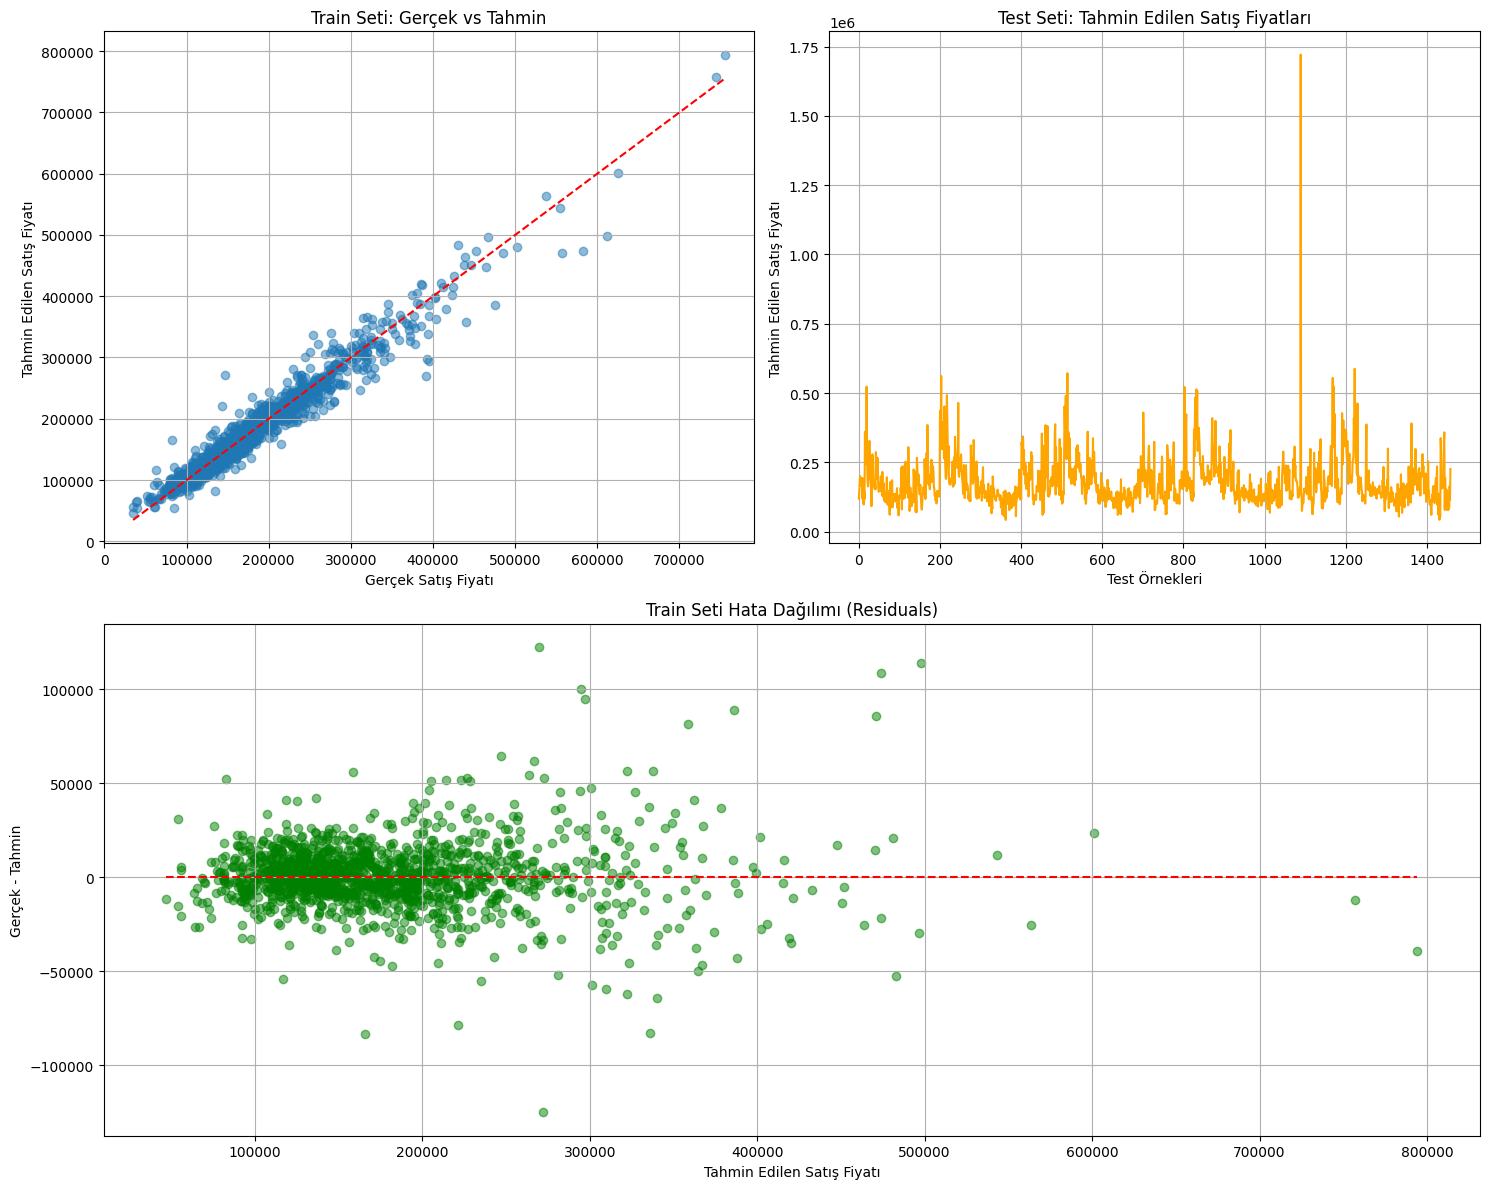

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Model zaten alpha=0.0004 ile eğitildi ve lasso_model olarak hazır

# Train tahminleri (log ölçeğinde)
y_train_pred_log = lasso_model.predict(X_train)
y_train_pred = np.expm1(y_train_pred_log)  # Orijinal ölçeğe geri dönüş
y_train_true = np.expm1(y_train)           # Gerçek değerler orijinal ölçekte

# Test tahminleri (log ölçeğinde)
y_test_pred_log = lasso_model.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)   # Orijinal ölçek

plt.figure(figsize=(15, 12))

# 1. Grafik: Train Gerçek vs Tahmin
plt.subplot(2, 2, 1)
plt.scatter(y_train_true, y_train_pred, alpha=0.5)
plt.plot([y_train_true.min(), y_train_true.max()],
         [y_train_true.min(), y_train_true.max()],
         'r--')
plt.title('Train Seti: Gerçek vs Tahmin')
plt.xlabel('Gerçek Satış Fiyatı')
plt.ylabel('Tahmin Edilen Satış Fiyatı')
plt.grid(True)

# 2. Grafik: Test Tahminleri (Gerçek Yok)
plt.subplot(2, 2, 2)
plt.plot(range(len(y_test_pred)), y_test_pred, color='orange')
plt.title('Test Seti: Tahmin Edilen Satış Fiyatları')
plt.xlabel('Test Örnekleri')
plt.ylabel('Tahmin Edilen Satış Fiyatı')
plt.grid(True)

# 3. Grafik: Train Seti Hata Dağılımı (Residuals)
residuals = y_train_true - y_train_pred
plt.subplot(2, 1, 2)
plt.scatter(y_train_pred, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='r', linestyles='dashed')
plt.title('Train Seti Hata Dağılımı (Residuals)')
plt.xlabel('Tahmin Edilen Satış Fiyatı')
plt.ylabel('Gerçek - Tahmin')
plt.grid(True)

plt.tight_layout()
plt.show()


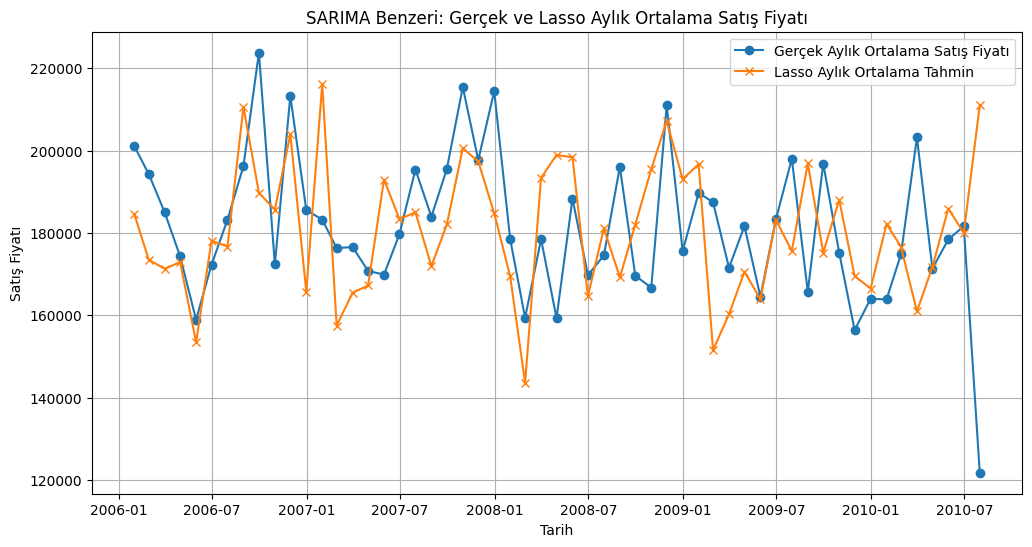

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Aylık ortalama gerçek satış fiyatı (zaten sende var)
monthly_sales = train_df.set_index('DateSold')['SalePrice'].resample('M').mean()

# 2. Lasso tahminlerini train_df ile eşleştir (train_df sıralı olsun)
# Önce X_train indeksi ile train_df sırası uyuşmazsa sorun olur,
# bunu aşağıdaki gibi düzeltelim:

# Train veri indeksi ve tarih
train_idx = X_train.index
train_dates = train_df.loc[train_idx, 'DateSold']

# Lasso tahminleri (log ters dönüş)
y_train_pred = np.expm1(lasso_model.predict(X_train))

# Tahminleri dataframe yap, tarih ile eşleştir
pred_df = pd.DataFrame({'DateSold': train_dates, 'PredictedSalePrice': y_train_pred})

# Tarihe göre aylık ortalama tahmin
monthly_pred = pred_df.set_index('DateSold').resample('M').mean()

# 3. Grafik çizimi (SARIMA gibi)
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Gerçek Aylık Ortalama Satış Fiyatı', marker='o')
plt.plot(monthly_pred.index, monthly_pred.values, label='Lasso Aylık Ortalama Tahmin', marker='x')
plt.title('SARIMA Benzeri: Gerçek ve Lasso Aylık Ortalama Satış Fiyatı')
plt.xlabel('Tarih')
plt.ylabel('Satış Fiyatı')
plt.legend()
plt.grid(True)
plt.show()


Proje Özeti

Bu proje, emlak piyasasında ev fiyatlarını tahmin etmek ve piyasa trendlerini analiz etmek amacıyla hazırlanmıştır. Veri temizleme ve TotalSF, Age, RemodAge gibi yeni özelliklerin eklenmesiyle veri seti zenginleştirilmiştir. Lasso ve Ridge regresyon modelleri kullanılarak fiyat tahminleri yapılmış, en iyi sonuçlar elde edilmiştir. Ayrıca SARIMA tabanlı zaman serisi analizi ile fiyatlardaki trend ve mevsimsel değişimler incelenmiş, geleceğe yönelik tahminler sağlanmıştır. Proje, emlak piyasasında veri odaklı kararlar alınmasına yardımcı olan kapsamlı bir çözüm sunmaktadır.